## Import necessary libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score

## Generate the dataset in the form of a ring

In [38]:
def genRandPointsInRing(r_in_p, r_out_p, r_in_n, r_out_n, center, n):
    
    r_in_arr = np.random.uniform(r_in_p,r_out_p,n)
    r_out_arr = np.random.uniform(r_in_n,r_out_n,n)
    theta_arr = np.random.uniform(0,2*np.pi,n)
    
    cos_theta = np.cos(theta_arr)
    sin_theta = np.sin(theta_arr)
    c1 = center[0]
    c2 = center[1]
    
    x_inn = c1 + np.multiply(r_in_arr,cos_theta)
    y_inn = c2 + np.multiply(r_in_arr,sin_theta)
    
    x_out = c1 + np.multiply(r_out_arr,cos_theta)
    y_out = c2 + np.multiply(r_out_arr,sin_theta)
    
    return (x_inn, x_out, y_inn, y_out)

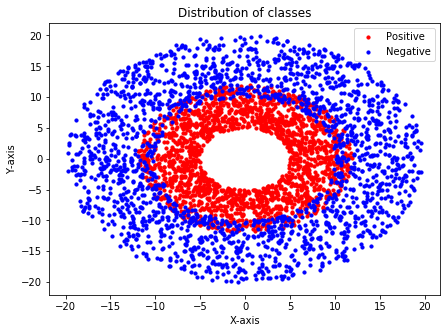

In [39]:
x_inn,x_out,y_inn,y_out = genRandPointsInRing(5,12,10,20,[0,0],2000)
fig = plt.figure(figsize = (7,5))
plt.scatter(x_inn, y_inn, c= 'red', s = 10, label = 'Positive')
plt.scatter(x_out, y_out, c= 'blue', s = 10, label = 'Negative')
plt.legend()
plt.title("Distribution of classes")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## Combine positive and negative class data to form the complete dataset

In [40]:
inn_arr = np.vstack((x_inn,y_inn)).T

y_inn = np.array([1 for i in range(inn_arr.shape[0])])

out_arr = np.vstack((x_out, y_out)).T

y_out = np.array([0 for i in range(out_arr.shape[0])])

overall_arr = np.vstack((inn_arr, out_arr))
print(overall_arr.shape)

overall_y = np.hstack((y_inn, y_out))

data = np.hstack((overall_arr, np.matrix(overall_y).T))
print(data.shape)

np.random.shuffle(data)

(4000, 2)
(4000, 3)


## Split the data into training and testing sets

In [41]:
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Train a perceptron on this data set and report accuracy on testing set

In [42]:
clf = Perceptron()
clf.fit(X_train, np.ravel(y_train))
y_pred = clf.predict(X_test)
print(accuracy_score(np.ravel(y_test), y_pred))

0.5025


## Visualize the decision boundary for this perceptron

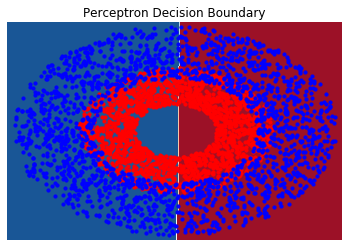

In [43]:
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
fig, ax = plt.subplots()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu_r)
ax.axis('off')

# Plot also the training points
plt.scatter(inn_arr[:,0],inn_arr[:,1],s=10,c="r")
plt.scatter(out_arr[:,0],out_arr[:,1],s=10,c="b")
ax.set_title('Perceptron Decision Boundary')
plt.show()

## Map the data to some other space and visualize the data

In [44]:
def circletoLine(inn_arr):
    x = inn_arr[:,0]
    y = inn_arr[:,1]
    z = np.sqrt(np.square(x)+np.square(y))
    theta = np.arctan(y/x)
    return(z,theta)

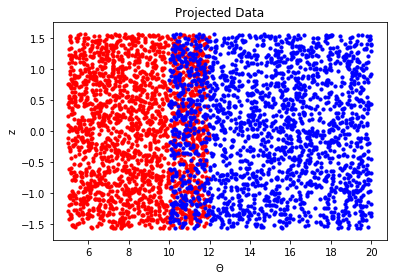

In [45]:
z1,theta1 = circletoLine(inn_arr)
z2,theta2 = circletoLine(out_arr)
plt.scatter(z1,theta1,s=10,c="r")
plt.scatter(z2,theta2,s=10,c="b")
plt.xlabel("$\Theta$")
plt.ylabel("z")
plt.title("Projected Data")
plt.show()

## Train a perceptron on this transformed data

In [46]:
inn_arr_2 = np.vstack((z1,theta1)).T
out_arr_2 = np.vstack((z2,theta2)).T
linear_arr = np.vstack((inn_arr_2,out_arr_2))
linear_data = np.hstack((linear_arr,np.matrix(overall_y).T))
print(linear_data.shape)

(4000, 3)


In [47]:
X,y = linear_data[:,:-1],linear_data[:,-1] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [48]:
clf = Perceptron()
clf.fit(X_train, np.ravel(y_train))
y_pred = clf.predict(X_test)
print(accuracy_score(np.ravel(y_test), y_pred))

0.895


## Visualize the decision boundary

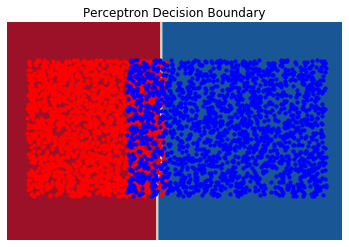

In [49]:
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax1 = plt.subplots()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax1.contourf(xx, yy, Z, cmap=plt.cm.RdBu_r)
ax1.axis('off')

# Plot also the training points
plt.scatter(inn_arr_2[:,0],inn_arr_2[:,1],s=10,c="r")
plt.scatter(out_arr_2[:,0],out_arr_2[:,1],s=10,c="b")
ax1.set_title('Perceptron Decision Boundary')
plt.show()

### Effect of data normalization on perceptron performance

In [58]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X1 = data.data
y1 = data.target
norm_scheme_1 = StandardScaler()
#norm_scheme_2 = MinMaxScaler()
X1 = norm_scheme_1.fit_transform(X1)

X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2)

In [59]:
clf = Perceptron(random_state=42)
clf.fit(X_train,np.ravel(y_train))
y_pred = clf.predict(X_test)
print("Accuracy Score of our classifier is: {}".format(accuracy_score(np.ravel(y_test),y_pred)))

Accuracy Score of our classifier is: 0.956140350877193


# Training a Perceptron for Multi-Class classification 

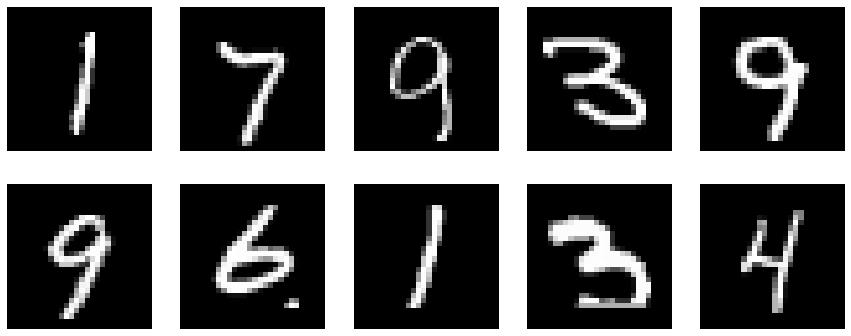

In [72]:
train_data = pd.read_csv("E:\Work Space\Ecko data\mnist_train\mnist_train.csv").values
X_train = train_data[:,1:]
y_train = train_data[:,0]
rand_idx = np.random.choice(train_data.shape[0],10)
fig,ax = plt.subplots(2,5,figsize=(15,6))
c = 0
for i in range(2):
    for j in range(5):
        img_arr = X_train[rand_idx[c],:]
        img_arr = np.uint8(img_arr.reshape(28,28))
        ax[i,j].imshow(img_arr, cmap="gray")
        ax[i,j].set_axis_off()
        c += 1
plt.show()

In [73]:
clf = Perceptron()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
clf.fit(X_train, np.ravel(y_train))
W_ls = clf.coef_
print(W_ls.shape)

(10, 784)


## Visualising the weight matrices

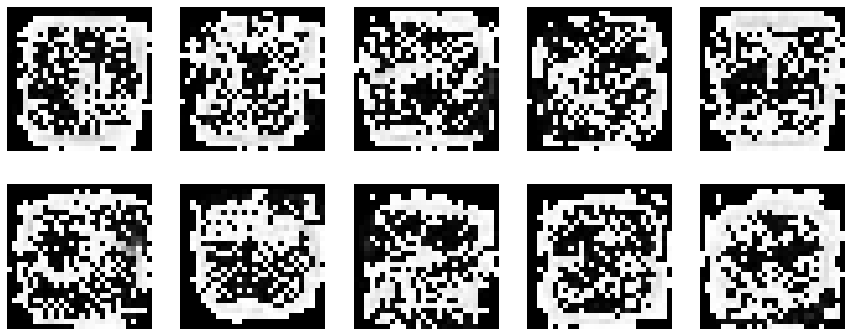

In [74]:
fig,ax = plt.subplots(2,5,figsize=(15,6))
c = 0
for i in range(2):
    for j in range(5):
        wt_img = W_ls[c].reshape(28,28)
        wt_img = np.uint8(wt_img)
        ax[i,j].imshow(wt_img,cmap="gray")
        ax[i,j].set_axis_off()
        c += 1
plt.show()

## Getting the testing accuracy

In [75]:
test_data = pd.read_csv("E:\Work Space\Ecko data\mnist_test\mnist_test.csv").values
X_test = test_data[:,1:]
y_test = test_data[:,0]
X_test = scaler.fit_transform(X_test)
y_pred = clf.predict(X_test)
print("Accuracy Score of our multi-class classifier is: {}".format(accuracy_score(np.ravel(y_test),y_pred)))

Accuracy Score of our multi-class classifier is: 0.8924
